In [5]:
from lxml import etree

# Read the XML file as bytes
with open("экспорт.xml", "rb") as file:
    xml_content = file.read()

# Parse the XML content
root = etree.fromstring(xml_content)

# Define namespace mappings
namespaces = {
    'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main',
    'v': 'urn:schemas-microsoft-com:vml'
}

# Extract and print text from textboxes
for textbox in root.xpath('.//v:textbox', namespaces=namespaces):
    for text_elem in textbox.xpath('.//w:t', namespaces=namespaces):
        print(text_elem.text)


Квитанция взвешивания от 28.08.23 15:09
ООО
 "ТД"Карелия
 Неруд"
Дата|Время
№
 вагона
--------Вид
 груза--------
Груз-сть
Брутто
Тара
Нетто
Пр|Нд
Скор.
Поставщик|Адресат
  №
  
Тел.
 1
Тел.
 2
22.08.23
 12:08
Тепловоз
 ТЭМ2
115,80
-4,5
22.08.23
 12:08
1,1
57,90
58,00
22.08.23
 12:08
69,50
80,40
23,30
57,10
12,40
-4,6
22.08.23
 12:08
1,2
40,80
39,60
22.08.23
 12:09
87,40
-4,7
22.08.23
 12:09
1,3
42,70
44,70
22.08.23
 12:09
85,70
-4,7
22.08.23
 12:09
1,4
43,80
41,90
22.08.23
 12:09
87,90
-4,7
22.08.23
 12:09
1,5
44,60
43,30
22.08.23
 12:09
83,90
-4,9
22.08.23
 12:09
1,6
41,60
42,40
22.08.23
 12:09
86,40
-5,1
22.08.23
 12:09
1,7
43,20
43,20
22.08.23
 12:09
86,90
-5,2
22.08.23
 12:09
1,8
42,50
44,40
22.08.23
 12:10
86,50
-5,3
22.08.23
 12:10
1,9
42,80
43,60
22.08.23
 12:10
85,90
-5,4
22.08.23
 12:10
1,10
42,40
43,50
22.08.23
 12:10
86,20
-5,4
22.08.23
 12:10
1,11
44,30
41,90
22.08.23
 12:10
87,00
-5,5
22.08.23
 12:10
1,12
44,10
42,90
22.08.23
 12:10
86,30
-5,5
22.08.23
 12:10
1,13
42,10
44

In [6]:
import re

# Read the contents of the file

def check_date_format(s):
    pattern = r'^\d{2}\.\d{2}\.\d{2}$'
    return bool(re.match(pattern, s))

def find_all_date_y(results):
    y_positions = []
    for item in results:
        text = item['text']
        x = item['position']['margin-left']
        y = item['position']['margin-top']
        if check_date_format(text) and x >= 0 and y >= 0:
            y_positions.append(y)
            # print(text, y)

    y_positions = sorted(list(set(y_positions)))
    return y_positions

# print(find_all_date_y())

In [7]:
def pt_in_2_value(value: str) -> int:
    suffix = value[-2:]
    core = int(value[:-2])
    if suffix == 'pt':
        return core
    elif suffix == 'in':
        return core * 72
    else:
        return ValueError

In [8]:
import re

# Read the contents of the file
with open("clear_position.txt", "r") as file:
    data = file.read()

# Find all the y-positions corresponding to dates in the specified format
date_pattern = r'(\d{2}\.\d{2}\.\d{2})\s+Position: \d+pt (\d+\.?\d*)pt'
matches = re.findall(date_pattern, data)

# Grouping y-positions by date
date_to_y_positions = []
for date, y in matches:
    date_to_y_positions.append(float(y))
date_to_y_positions = sorted(list(set(date_to_y_positions)))
print(date_to_y_positions)


[82.0, 97.0, 111.0, 125.0, 140.0, 154.0, 169.0, 183.0, 197.0, 212.0, 226.0, 241.0, 255.0, 269.0, 284.0, 298.0, 313.0, 327.0, 341.0, 356.0, 370.0, 385.0, 399.0, 413.0, 428.0, 442.0, 457.0, 471.0, 485.0, 500.0, 514.0, 529.0]


In [9]:
import xml.etree.ElementTree as ET
from copy import deepcopy

# Parse the XML
tree = ET.parse('экспорт.xml')
root = tree.getroot()

# Define the XML namespaces used in your XML
namespaces = {
    'v': 'urn:schemas-microsoft-com:vml',
    'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'
}

WRITE = False
# min_y = min(find_all_date_y(results))
# print(min_y)
# y_offset = min_y
page = 0
# Iterate over the text boxes in the XML and extract position and text
results = []
for rect in root.findall(".//v:rect", namespaces):
    style = rect.get('style')
    # Extract position data from style attribute
    position_data = {}
    for pair in style.split(';'):
        name, _, value = pair.partition(':')
        position_data[name] = value

    # Get text data
    text_content = rect.find(".//w:t", namespaces)
    if text_content is not None:
        text = text_content.text

        if 'Страница' in text:
            WRITE = False
            # reset this result y values to start from 0 by finding the smallest y and subtracting it from every y value
            # add y_offset ()
            # min_y = min(find_all_date_y(results))
            # print(min_y)
            # y_offset = min_y

        if WRITE:
            ml = pt_in_2_value(position_data['margin-left'])
            mt = pt_in_2_value(position_data['margin-top'])
            w = pt_in_2_value(position_data['width'])
            h = pt_in_2_value(position_data['height'])

            if not (ml >= 0 and mt >= 0 and w >= 0 and h >= 0):
                continue

            position = {'margin-left': ml,
                        'margin-top': mt,
                        'width': w,
                        'height': h}

            results.append({
                'text': text,
                'position': position,
                'page': page
            })

        if text == ' 2':
            WRITE = True
            page += 1

# Print the results
results_backup = deepcopy(results)
for item in results:
    print(item['text'])
    print("Position:", item['position']['margin-left'],
          item['position']['margin-top'], item['page'])

Тепловоз
Position: 163 82 1
 ТЭМ2
Position: 207 82 1
115,80
Position: 331 82 1
-4,5
Position: 485 83 1
22.08.23
Position: 42 82 1
 12:08
Position: 81 82 1
1,1
Position: 16 82 1
57,90
Position: 517 83 1
58,00
Position: 553 83 1
69,50
Position: 298 97 1
80,40
Position: 337 97 1
23,30
Position: 374 97 1
57,10
Position: 408 97 1
12,40
Position: 443 97 1
-4,6
Position: 485 98 1
22.08.23
Position: 42 97 1
 12:08
Position: 81 97 1
1,2
Position: 16 97 1
40,80
Position: 517 98 1
39,60
Position: 553 98 1
87,40
Position: 337 111 1
-4,7
Position: 485 112 1
22.08.23
Position: 42 111 1
 12:09
Position: 81 111 1
1,3
Position: 16 111 1
42,70
Position: 517 112 1
44,70
Position: 553 112 1
85,70
Position: 337 125 1
-4,7
Position: 485 127 1
22.08.23
Position: 42 125 1
 12:09
Position: 81 125 1
1,4
Position: 16 125 1
43,80
Position: 517 127 1
41,90
Position: 553 126 1
87,90
Position: 337 140 1
-4,7
Position: 485 141 1
22.08.23
Position: 42 140 1
 12:09
Position: 81 140 1
1,5
Position: 16 140 1
44,60
Positi

In [13]:
from copy import deepcopy

unique_pages = len(set([item['page'] for item in results]))

page_offset = 0

for page in list(range(1, unique_pages+1)):
    page_data = [item for item in results if item['page'] == page]
    all_date_y = find_all_date_y(page_data)
    y_offset = min(all_date_y)

    for item in results:
        if item['page'] == page:
            item['position']['margin-top'] += -y_offset + page_offset

    page_data = [item for item in results if item['page'] == page]
    all_date_y = find_all_date_y(page_data)
    page_offset += max(all_date_y)+15

# Print the results
for item in results:
    print(item['text'])
    print("Position:", item['position']['margin-left'],
          item['position']['margin-top'], item['page'])

Тепловоз
Position: 163 0 1
 ТЭМ2
Position: 207 0 1
115,80
Position: 331 0 1
-4,5
Position: 485 1 1
22.08.23
Position: 42 0 1
 12:08
Position: 81 0 1
1,1
Position: 16 0 1
57,90
Position: 517 1 1
58,00
Position: 553 1 1
69,50
Position: 298 15 1
80,40
Position: 337 15 1
23,30
Position: 374 15 1
57,10
Position: 408 15 1
12,40
Position: 443 15 1
-4,6
Position: 485 16 1
22.08.23
Position: 42 15 1
 12:08
Position: 81 15 1
1,2
Position: 16 15 1
40,80
Position: 517 16 1
39,60
Position: 553 16 1
87,40
Position: 337 29 1
-4,7
Position: 485 30 1
22.08.23
Position: 42 29 1
 12:09
Position: 81 29 1
1,3
Position: 16 29 1
42,70
Position: 517 30 1
44,70
Position: 553 30 1
85,70
Position: 337 43 1
-4,7
Position: 485 45 1
22.08.23
Position: 42 43 1
 12:09
Position: 81 43 1
1,4
Position: 16 43 1
43,80
Position: 517 45 1
41,90
Position: 553 44 1
87,90
Position: 337 58 1
-4,7
Position: 485 59 1
22.08.23
Position: 42 58 1
 12:09
Position: 81 58 1
1,5
Position: 16 58 1
44,60
Position: 517 59 1
43,30
Position:

[0, 15, 29, 43, 58, 72, 87, 101, 115, 130, 144, 159, 173, 187, 202, 216, 231, 245, 259, 274, 288, 303, 317, 331, 346, 360, 375, 389, 403, 418, 432, 447, 462, 476, 491]


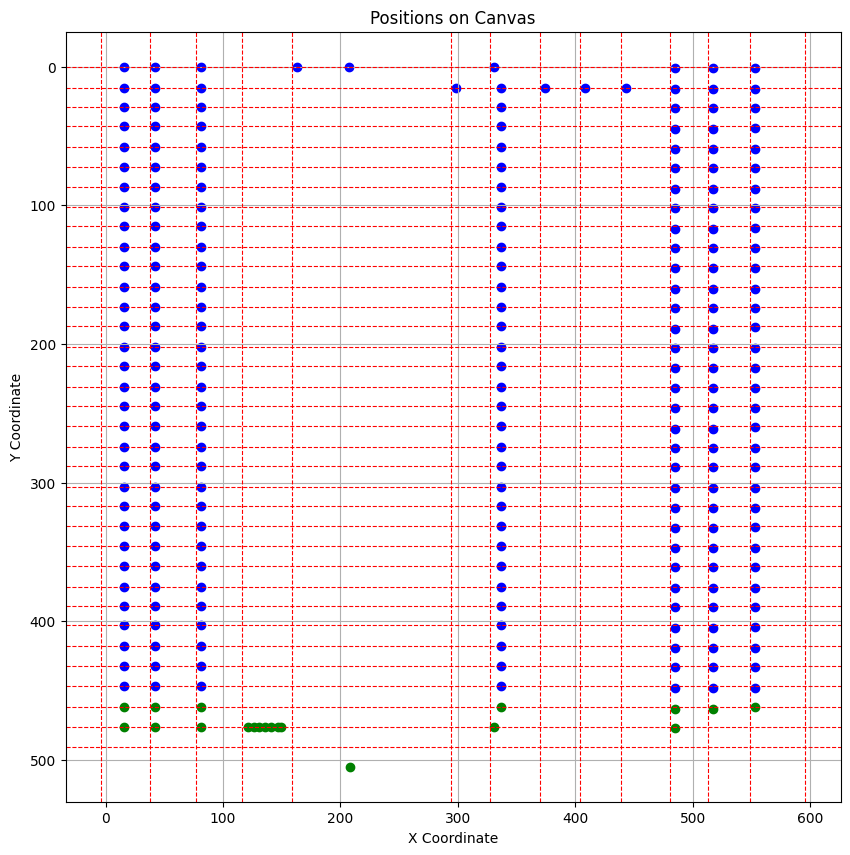

In [14]:
import matplotlib.pyplot as plt
import re


# Split the x and y coordinates
# x_coords = [float(x) for x, _ in positions]
# y_coords = [float(y) for _, y in positions]

# Normalize if necessary (depending on the size of your canvas and the range of your coordinates)
# Here, as an example, I'm multiplying by a factor for visualization. Adjust as needed.
x_coords = [item['position']['margin-left'] for item in results]
y_coords = [item['position']['margin-top'] for item in results]

plt.figure(figsize=(10, 10))
# plt.scatter(x_coords, y_coords)
# Plot points with color based on 'page'
for item in results:
    x = item['position']['margin-left']
    y = item['position']['margin-top']
    if item['page'] == 1:
        plt.scatter(x, y, color='blue')
    elif item['page'] == 2:
        plt.scatter(x, y, color='green')

date_to_y_positions = find_all_date_y(results)

x_borders = [x - 4 for x in [0, 42, 81, 120, 163, 298, 331, 374, 408, 443, 485, 517, 553, 600]]
y_borders = [*date_to_y_positions, max(date_to_y_positions) + 15]
print(y_borders)

# Draw several vertical and horizontal lines
for x_line in x_borders:  # You can change these values to your needs
    plt.axvline(x=x_line, color='red', linestyle='--', linewidth=0.8)

for y_line in y_borders:  # Again, adjust these values as needed
    plt.axhline(y=y_line, color='red', linestyle='--', linewidth=0.8)


# Set x-axis limits
# plt.xlim(0, 25)

plt.gca().invert_yaxis()  # This will make the top left corner (0,0) as is common with many graphics systems
plt.title('Positions on Canvas')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

# List of desired column names
columns = ["№", "Дата", "Время", "№ вагона", "Вид груза", "Груз-сть", "Брутто", "Тара", "Нетто", "Пр|Нд", "Скор.", "Тел. 1", "Тел. 2"]
df = pd.DataFrame(columns=columns)  # Create an empty DataFrame with desired column names

# Assuming y_borders and x_borders are defined elsewhere
# Assuming results is defined elsewhere

for yi, y in enumerate(y_borders[:-1]):
    for xi, x in enumerate(x_borders[:-1]):
        # Initialize an empty string to collect all item texts within the cell
        cell_text = ''
        
        for item in results:
            ml = item['position']['margin-left']
            mt = item['position']['margin-top']
            
            if ml >= x and ml < x_borders[xi+1] and mt >= y and mt < y_borders[yi+1]:
                # Concatenate item text to the cell_text
                cell_text += item['text'] + ' '
        
        # Remove trailing space
        cell_text = cell_text.rstrip()
        
        # Update DataFrame cell at (yi, xi) with the cell_text
        if xi < len(columns):
            column_name = columns[xi]
            if len(df) <= yi:
                df.loc[yi] = [None] * len(columns)  # Add a new row if required
            df.at[yi, column_name] = cell_text

# Show the DataFrame
df


,№,Дата,Время,№ вагона,Вид груза,Груз-сть,Брутто,Тара,Нетто,Пр|Нд,Скор.,Тел. 1,Тел. 2
0,"1,1",22.08.23,12:08,,Тепловоз ТЭМ2,,"115,80",,,,"-4,5","57,90","58,00"
1,"1,2",22.08.23,12:08,,,"69,50","80,40","23,30","57,10","12,40","-4,6","40,80","39,60"
2,"1,3",22.08.23,12:09,,,,"87,40",,,,"-4,7","42,70","44,70"
3,"1,4",22.08.23,12:09,,,,"85,70",,,,"-4,7","43,80","41,90"
4,"1,5",22.08.23,12:09,,,,"87,90",,,,"-4,7","44,60","43,30"
5,"1,6",22.08.23,12:09,,,,"83,90",,,,"-4,9","41,60","42,40"
6,"1,7",22.08.23,12:09,,,,"86,40",,,,"-5,1","43,20","43,20"
7,"1,8",22.08.23,12:09,,,,"86,90",,,,"-5,2","42,50","44,40"
8,"1,9",22.08.23,12:10,,,,"86,50",,,,"-5,3","42,80","43,60"
9,"1,10",22.08.23,12:10,,,,"85,90",,,,"-5,4","42,40","43,50"
